
---
# - Reading in and Preparing Data

In [68]:
import pandas as pd

In [69]:
# reading in our data
data = pd.read_csv('SMSSpamCollection.tsv', header=None, sep='\t')
data.columns = ['label', 'text']
data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...  
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...  
2                                        Nah I don't think he goes to usf, he lives around here though  
3                        Even my brother is not like to speak with me. They treat me like aids patent.  
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!

In [70]:
# Let's change the number of words we can see with display.max_colwidth
pd.set_option('display.max_colwidth', 100)

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...  
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...  
2                                        Nah I don't think he goes to usf, he lives around here though  
3                        Even my brother is not like to speak with me. They treat me like aids patent.  
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!

----
## Removing Punctuations

In [71]:
import string

In [72]:
# let's see what are punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
def remove_punctuations(text):
    text_nopunct = [char for char in text if char not in string.punctuation]
    return text_nopunct

In [74]:
data['text_clean'] = data['text'].apply(lambda x: remove_punctuations(x))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            text_clean  
0  [I, v, e,  , b, e, e, n,  , s, e, a, r, c, h, i, n, g,  , f, o, r,  , t, h, e,  , r, i, g, h, t,...  
1  [F, r, e, e,  , e, n, t, r, y,  , i, n,  , 2,  , a,  , w, k, l, y,  , c, o, m, p,  , t, o,  , w,...  
2  [N, a, h,  , I,  , d, o, n, t,  , t, h, i, n, k,  , h, e,  , g, o, e, s,  , t, o,  , u, s, f,  ,...  
3  [E, v, e, n,  , m, y,  , b, r, o, t, h, e, r,  , i, s,  , n, o, t,  , l, i, k, e,  , t, o,  , s,...  
4  [I,  , H, A, V, E,  , A,  , D, A, T, E,  , O, N,  , S, U, N, D, A, Y,  , W, I, T, H,  , W, I, L, L]

As you can see in the last column, text_clean, now we have a list of each char. What we need is to join them together so we can have a sentence (string). For that, we can rewrite our remove_punctuations() method.

In [75]:
def remove_punctuations(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

data['text_clean'] = data['text'].apply(lambda x: remove_punctuations(x))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            text_clean  
0  Ive been searching for the right words to thank you for this breather I promise i wont take your...  
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...  
2                                          Nah I dont think he goes to usf he lives around here though  
3                          Even my brother is not like to speak with me They treat me like aids patent  
4                                                                    I HAVE A DATE ON SUNDAY WITH WILL

----
## Tokenization

In [76]:
import re

In [77]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

data['text_tokenized'] = data['text_clean'].apply(lambda x: tokenize(x.lower()))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            text_clean  \
0  Ive been searching for the right words to thank you for this breather I promise i wont take your...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...   
2                                          Nah I dont think he goes to usf he lives around here though   
3                          Even my brother is not like to speak with me They treat me like aids patent   
4                                                                    I HAVE A DATE ON SUNDAY WITH WILL   

                                                                                        text_tokenized  
0  [ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...  
1  [free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...  
2                            [nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]  
3         [even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]  
4                                                           [i, have, a, date, on, sunday, with, will]

----
## Removing StopWords

In [78]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 

In [79]:
def remove_stopwords(tokenized_list):
    result = [word for word in tokenized_list if word not in stop_words]
    return result

data['text_nostop'] = data['text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            text_clean  \
0  Ive been searching for the right words to thank you for this breather I promise i wont take your...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...   
2                                          Nah I dont think he goes to usf he lives around here though   
3                          Even my brother is not like to speak with me They treat me like aids patent   
4                                                                    I HAVE A DATE ON SUNDAY WITH WILL   

                                                                                        text_tokenized  \
0  [ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...   
1  [free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...   
2                            [nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]   
3         [even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]   
4                                                           [i, have, a, date, on, sunday, with, will]   

                                                                                           text_nostop  
0  [ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...  
1  [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...  
2                                                 [nah, dont, think, goes, usf, lives, around, though]  
3                                              [even, brother, like, speak, treat, like, aids, patent]  
4                                                                                       [date, sunday]

----
## Stemming

In [80]:
ps = nltk.PorterStemmer()

In [81]:
def stemming(text):
    result = [ps.stem(word) for word in text]
    return result

data['text_stemmed'] = data['text_nostop'].apply(lambda x: stemming(x))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            text_clean  \
0  Ive been searching for the right words to thank you for this breather I promise i wont take your...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...   
2                                          Nah I dont think he goes to usf he lives around here though   
3                          Even my brother is not like to speak with me They treat me like aids patent   
4                                                                    I HAVE A DATE ON SUNDAY WITH WILL   

                                                                                        text_tokenized  \
0  [ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...   
1  [free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...   
2                            [nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]   
3         [even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]   
4                                                           [i, have, a, date, on, sunday, with, will]   

                                                                                           text_nostop  \
0  [ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...   
1  [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...   
2                                                 [nah, dont, think, goes, usf, lives, around, though]   
3                                              [even, brother, like, speak, treat, like, aids, patent]   
4                                                                                       [date, sunday]   

                                                                                          text_stemmed  
0  [ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...  
1  [free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...  
2                                                   [nah, dont, think, goe, usf, live, around, though]  
3                                               [even, brother, like, speak, treat, like, aid, patent]  
4                                                                                       [date, sunday]

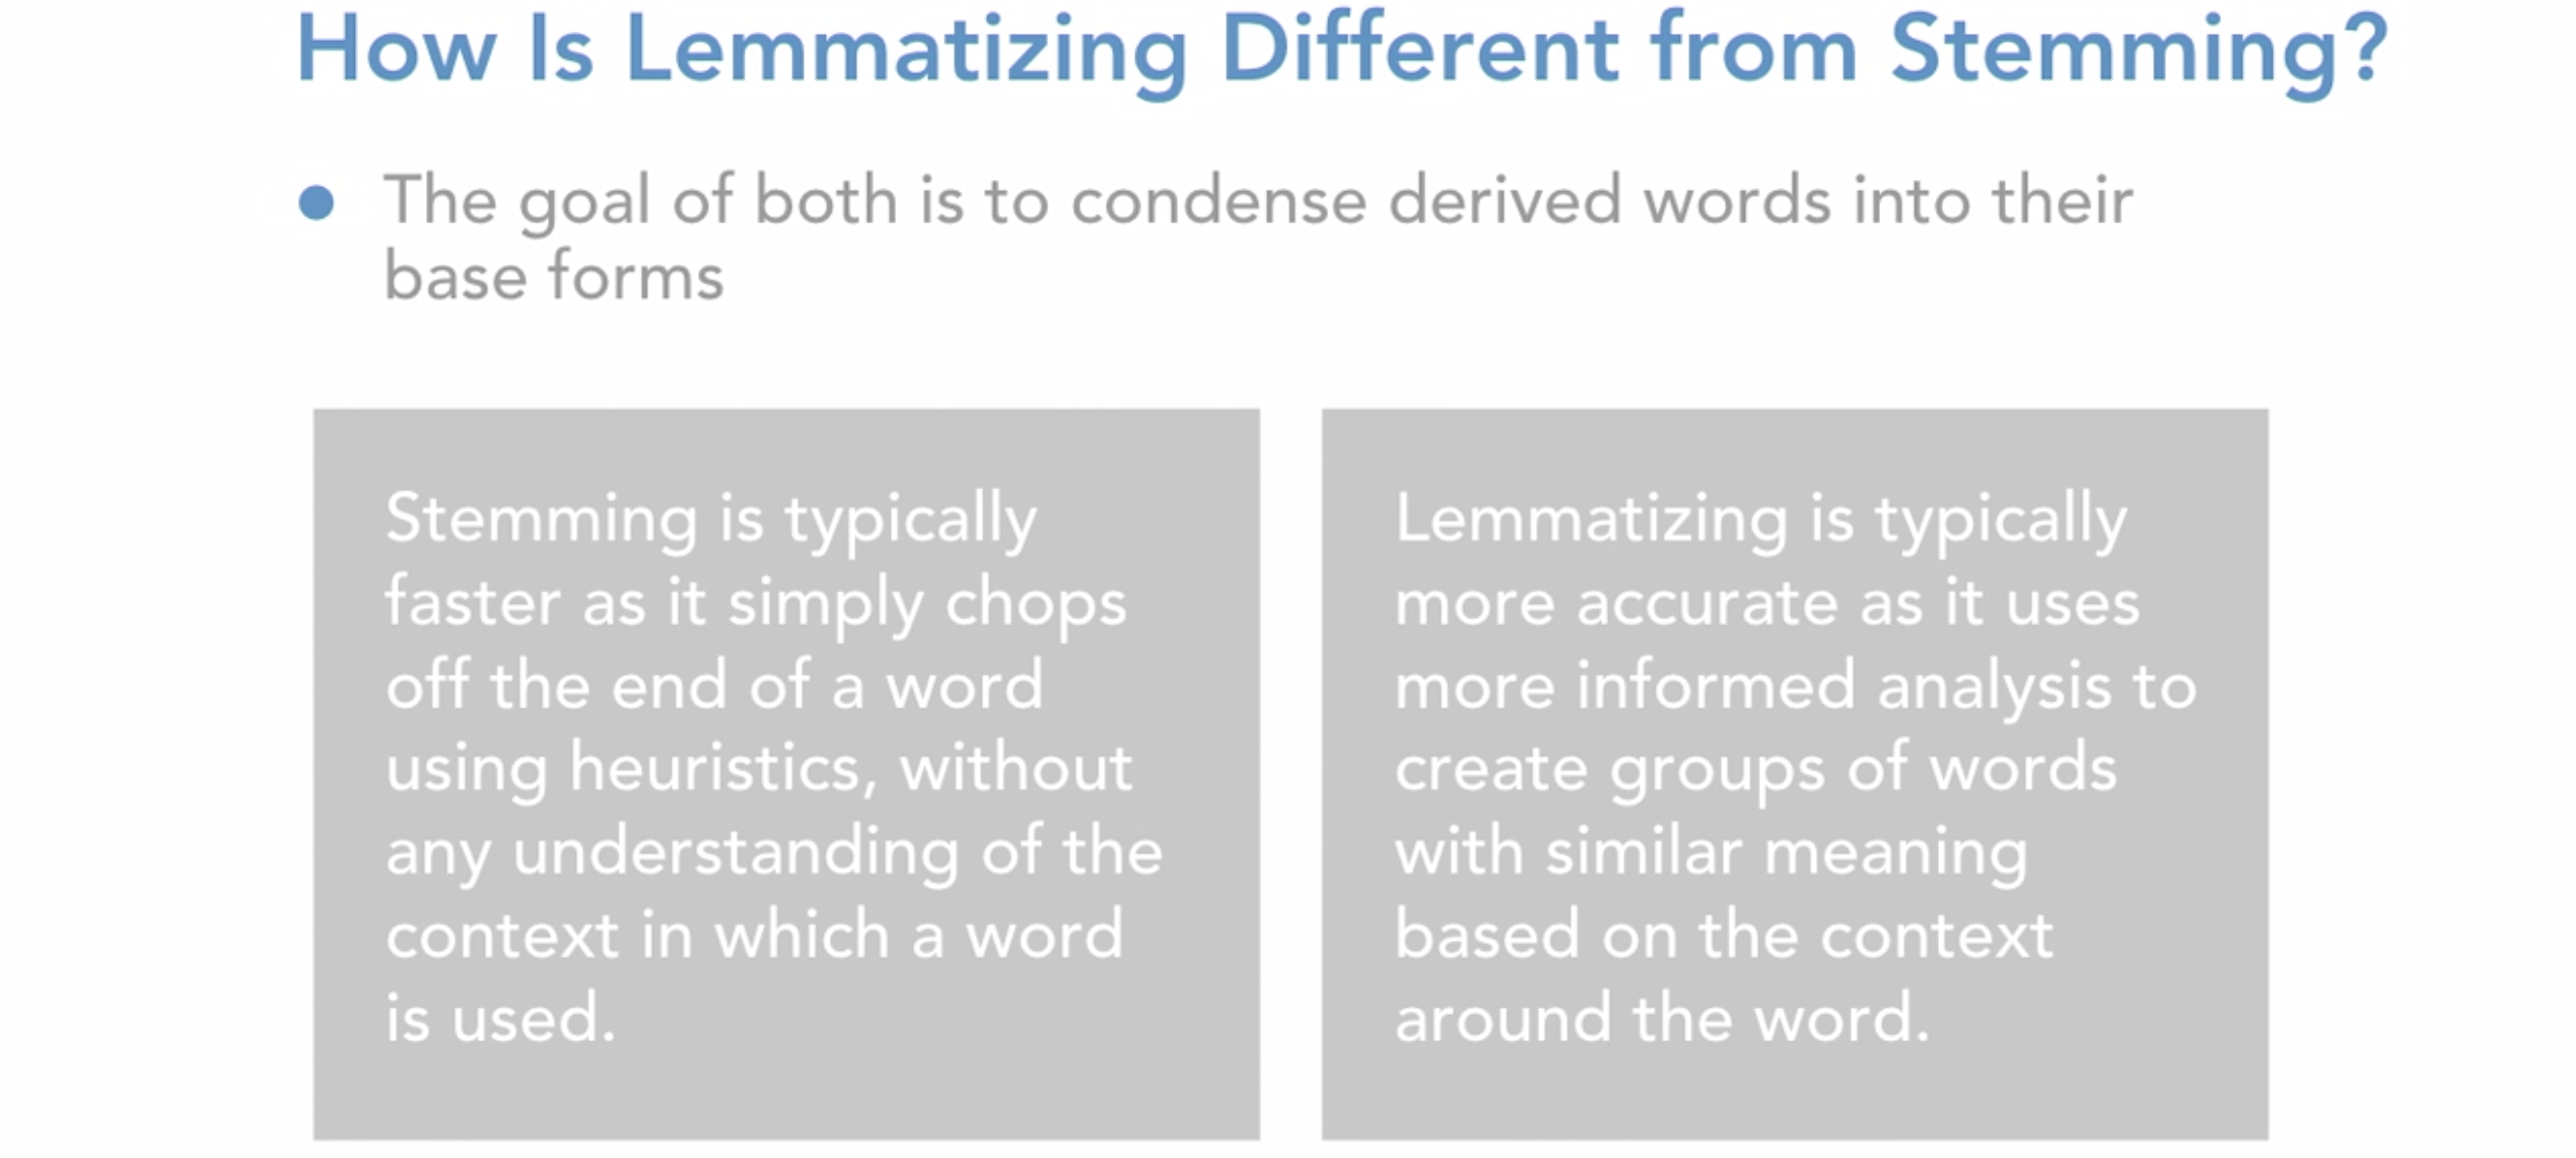

----
## Lemmatizing

In [82]:
wn = nltk.WordNetLemmatizer()

In [83]:
def lemmatizing(text):
    result = [wn.lemmatize(word) for word in text]
    return result

data['text_lemmatize'] = data['text_nostop'].apply(lambda x: lemmatizing(x))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            text_clean  \
0  Ive been searching for the right words to thank you for this breather I promise i wont take your...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...   
2                                          Nah I dont think he goes to usf he lives around here though   
3                          Even my brother is not like to speak with me They treat me like aids patent   
4                                                                    I HAVE A DATE ON SUNDAY WITH WILL   

                                                                                        text_tokenized  \
0  [ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...   
1  [free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...   
2                            [nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]   
3         [even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]   
4                                                           [i, have, a, date, on, sunday, with, will]   

                                                                                           text_nostop  \
0  [ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...   
1  [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...   
2                                                 [nah, dont, think, goes, usf, lives, around, though]   
3                                              [even, brother, like, speak, treat, like, aids, patent]   
4                                                                                       [date, sunday]   

                                                                                          text_stemmed  \
0  [ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...   
1  [free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...   
2                                                   [nah, dont, think, goe, usf, live, around, though]   
3                                               [even, brother, like, speak, treat, like, aid, patent]   
4                                                                                       [date, sunday]   

                                                                                        text_lemmatize  
0  [ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi...  
1  [free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...  
2                                                    [nah, dont, think, go, usf, life, around, though]  
3                                               [even, brother, like, speak, treat, like, aid, patent]  
4                                                                                       [date, sunday]

----
----
# - Vectorizing Raw Data

Let's do all the step above in a function

In [84]:
import re
import string
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [85]:
stop_words = set(stopwords.words('english')) 

wn = nltk.WordNetLemmatizer()

In [86]:
data = pd.read_csv('SMSSpamCollection.tsv', header=None, sep='\t')
data.columns = ['label', 'text']

----
## CountVectorizer

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

In [87]:
def clean_text(text):
    text_nopunct = ''.join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    nostopword_lemmatized = [wn.lemmatize(word) for word in tokens if word not in stop_words]
    return nostopword_lemmatized

vectorizer = CountVectorizer(analyzer=clean_text)
X = vectorizer.fit_transform(data['text'])

#print(X.toarray())
print(X.shape)
print(vectorizer.get_feature_names())

(5568, 8914)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

----
## N-Gram

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |




In [88]:
def joined_clean_text(text):
    text_nopunct = ''.join([char.lower() for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    nostopword_lemmatized = ' '.join([wn.lemmatize(word) for word in tokens if word not in stop_words])
    return nostopword_lemmatized

data['clean_text'] = data['text'].apply(lambda x: joined_clean_text(x))
data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

                                                                                            clean_text  
0  ive searching right word thank breather promise wont take help granted fulfil promise wonderful ...  
1  free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...  
2                                                             nah dont think go usf life around though  
3                                                        even brother like speak treat like aid patent  
4                                                                                          date sunday

In [89]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(data['clean_text'])

print(X.shape)
print(vectorizer.get_feature_names())

(5568, 31636)
['008704050406 sp', '0089my last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 reply', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrange', '07090298926 reschedule', '07099833605 reschedule', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guaranteed', '07808 xxxxxx', '07808247860 show', '07808726822 awarded', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 reply', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2opt

---
## TDF-IF Vectorizer


Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

In [90]:
vectorizer = TfidfVectorizer(analyzer=clean_text)
X = vectorizer.fit_transform(data['clean_text'])

print(X.shape)
print(vectorizer.get_feature_names())

(5568, 8897)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

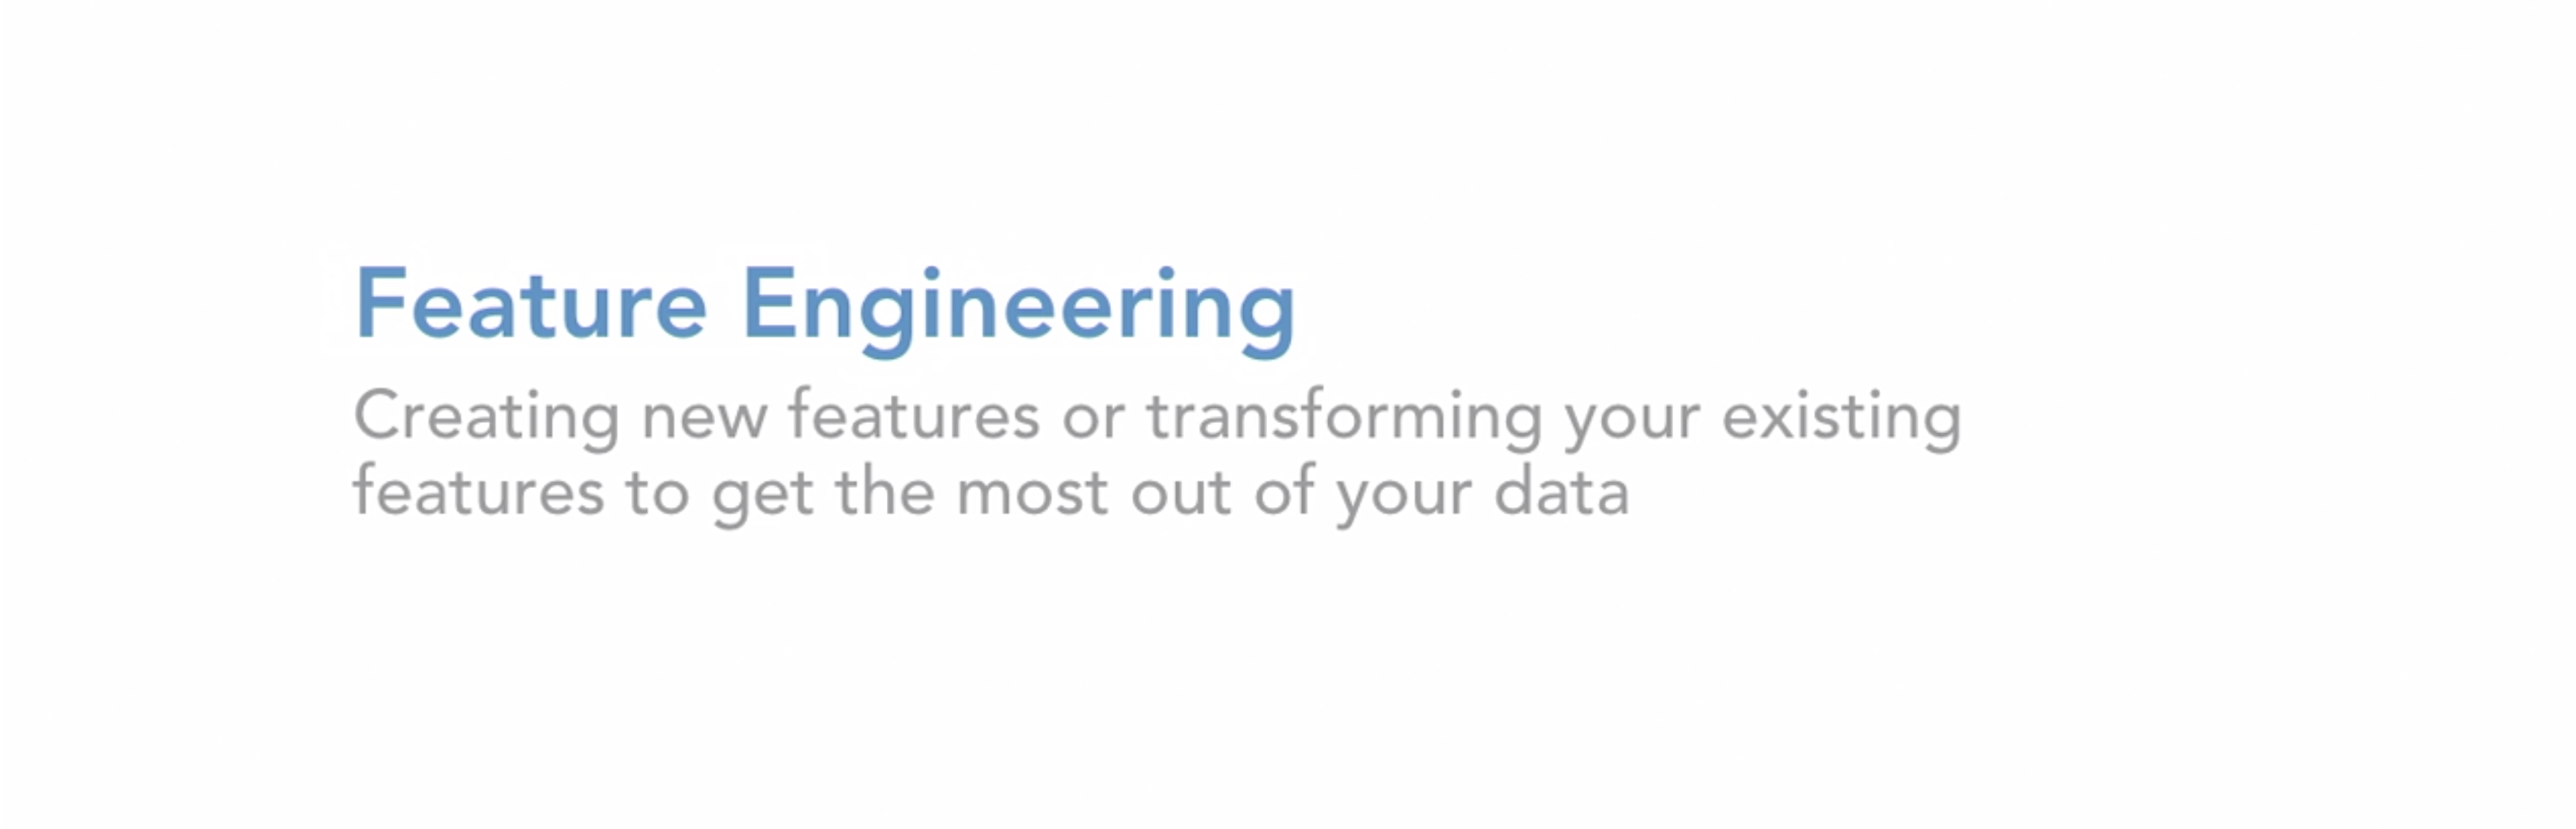

----
----
# - Feature Enginerring

In [91]:
import pandas as pd

In [113]:
data = pd.read_csv('SMSSpamCollection.tsv', header=None, sep='\t')
data.columns = ['label', 'text']

----
## Creating new features
##### Creating the first feature: Text Message Length

In [114]:
data['text_len'] = data['text'].apply(lambda x: len(x) - x.count(' '))
# len(x) - x.count(' ') will return the length without spaces

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

   text_len  
0       160  
1       128  
2        49  
3        62  
4        28

----
##### Creating the second feature: % of text that is punctuation

In [95]:
import string

In [116]:
def punct_count(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text)-text.count(' ')), 3)* 100

data['punctuation (%)'] = data['text'].apply(lambda x: punct_count(x))

data.head()

label  \
0   ham   
1  spam   
2   ham   
3   ham   
4   ham   

                                                                                                  text  \
0  I've been searching for the right words to thank you for this breather. I promise i wont take yo...   
1  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...   
2                                        Nah I don't think he goes to usf, he lives around here though   
3                        Even my brother is not like to speak with me. They treat me like aids patent.   
4                                                                  I HAVE A DATE ON SUNDAY WITH WILL!!   

   text_len  punctuation (%)  
0       160              2.5  
1       128              4.7  
2        49              4.1  
3        62              3.2  
4        28              7.1

----
## Evaluate Created Features

In [117]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

##### Let's evaluate the first feature (length)

bins created with linspace: 
 [  0.           5.12820513  10.25641026  15.38461538  20.51282051
  25.64102564  30.76923077  35.8974359   41.02564103  46.15384615
  51.28205128  56.41025641  61.53846154  66.66666667  71.79487179
  76.92307692  82.05128205  87.17948718  92.30769231  97.43589744
 102.56410256 107.69230769 112.82051282 117.94871795 123.07692308
 128.20512821 133.33333333 138.46153846 143.58974359 148.71794872
 153.84615385 158.97435897 164.1025641  169.23076923 174.35897436
 179.48717949 184.61538462 189.74358974 194.87179487 200.        ]


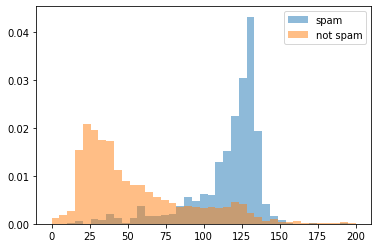

In [128]:
'''numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)[source]¶
Return evenly spaced numbers over a specified interval.'''
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['text_len'], bins=bins, density=True, alpha=.5, label='spam')
plt.hist(data[data['label']=='ham']['text_len'], bins=bins, density=True, alpha=.5, label='not spam')

plt.legend()
plt.show()

As we see here in this histogram:
you can see that body length is very different for ham versus spam. So spam text messages seem to be quite a bit longer than regular text messages. So it appears that this extra feature could be really helpful for the model to distinguish ham from spam. So if we didn't create this feature, the model may not necessarily pick up on this difference. 

----

##### And now, let's evaluate our second feature (%)

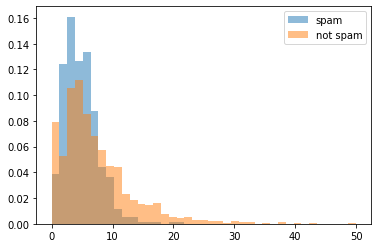

In [132]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punctuation (%)'], bins=bins, alpha=.5, density=True, label='spam')
plt.hist(data[data['label']=='ham']['punctuation (%)'], bins=bins, alpha=.5, density=True, label='not spam')
plt.legend()
plt.show()

you can see there's not nearly as much of a difference in punctuation use. You can see that spam might be a little bit more concentrated here on the left, whereas ham tends to have more of a tail over to the right-hand side. However, it's pretty clear which one of these new features is likely to help out the model the most. 

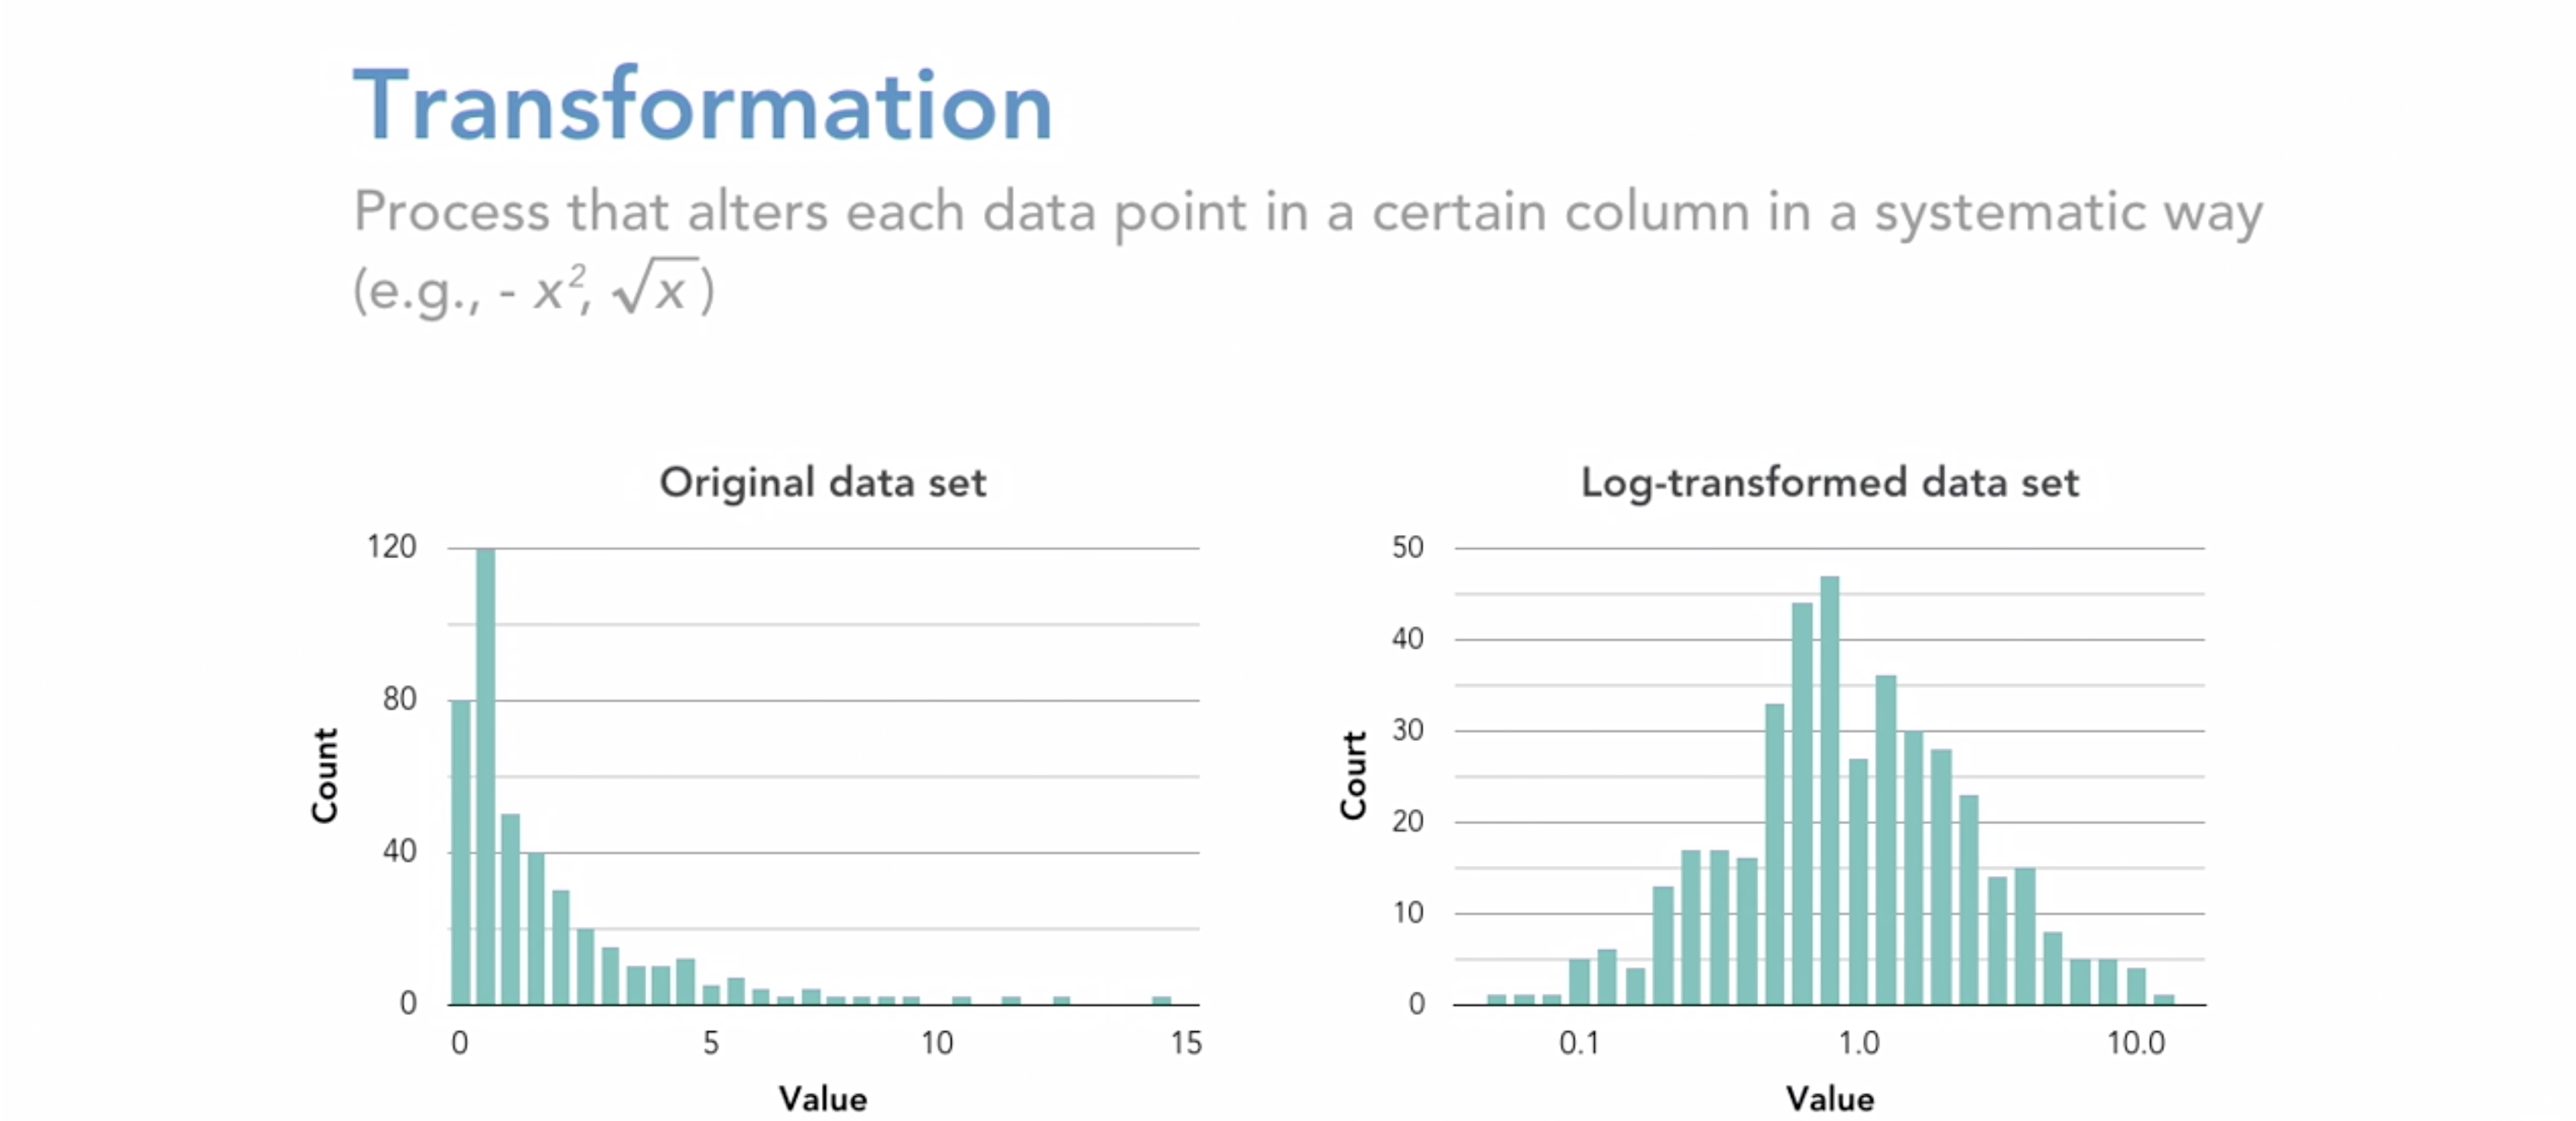
----
## Transformation

Let's create a full histogram for all the columns and labels.
**what we're looking for here is a dramatic skew with a really long tail or maybe a few outliers. These are scenarios that would make a feature a prime candidate for transformation.**

<function matplotlib.pyplot.show(*args, **kw)>

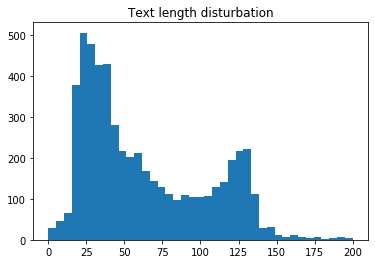

In [133]:
plt.hist(data['text_len'], bins=np.linspace(0, 200, 40))
plt.title('Text length disturbation')
plt.show

I wouldn't sat this is a great candidate for transformation **because it's not really heavily skewed and there's not really any clear outliers**

<function matplotlib.pyplot.show(*args, **kw)>

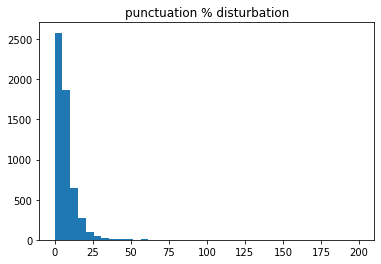

In [134]:
plt.hist(data['punctuation (%)'], bins=np.linspace(0, 200, 40))
plt.title('punctuation % disturbation')
plt.show

This one could very well be **a nice distribution for a transformation.** It's **fairly skewed here where we see a lot close to zero and then we see this tail out here extending all the way up to 40** with some of these outliers out here. 

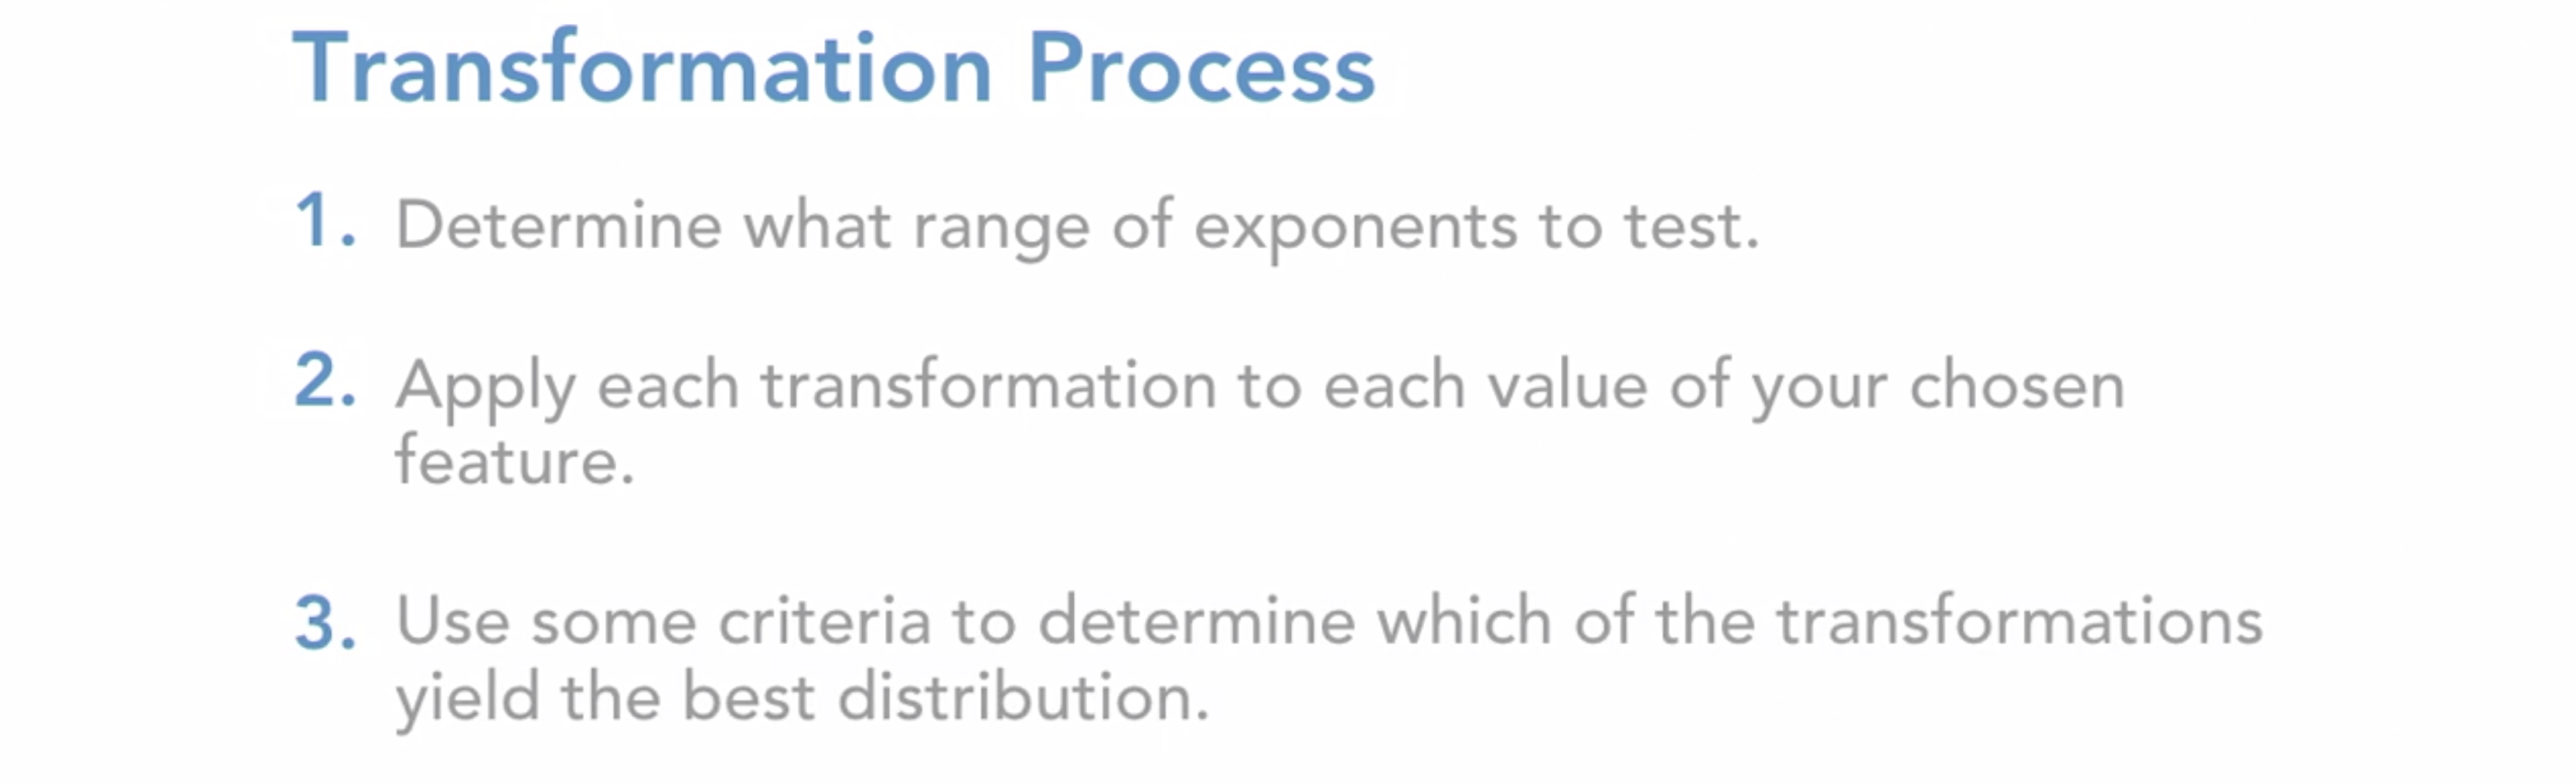


what we want to do is **apply a bunch of different power transformations and pick the histogram that looks the most like a normal distribution**. So what we're going to do is we're going to set up a for loop to loop through some different transformations and just plot the data with that transformation applied

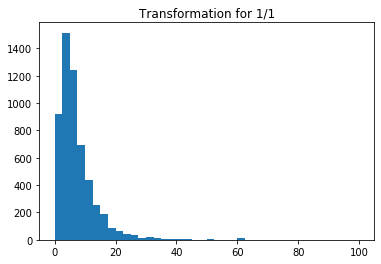

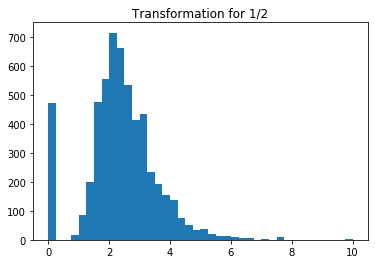

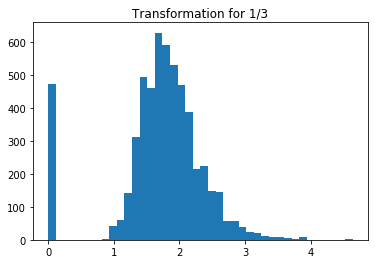

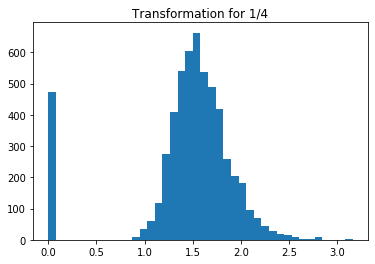

In [138]:
for i in range(1, 5):
    plt.hist((data['punctuation (%)']) ** (1/i), bins=40)
    plt.title('Transformation for 1/{}'.format(i))
    plt.show()

One fourth is a little bit better and then one fifth is even better. You'll notice that the outliers continue to get pulled in closer and closer to the center of the distribution. So given this view, transformation to be either one fourth or one fifth.